# **DRIVE ACCESS AUTHENTICATION**



In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORTING PACKAGES**

In [ ]:
import pandas as pd       # dataframe operations 
import numpy as np        # numeric operations 
import sklearn

# **READING THE DATASET**

In [ ]:
path = '/content/drive/MyDrive/Data/dementia_data.csv'  # path of the dataset 

df = pd.read_csv(path)  # reads data and stores as dataframe 




# **DATA PREPROCESSING**

**SOME PANDAS COMMANDS**

In [ ]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,1327,0.796,1.323


In [ ]:
# shows n entries from the beginning of the dataset 
#  default = 5 
df.head(4)  

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,1738,0.713,1.010


In [ ]:
# shows n entries from the end of the dataset 
#  default = 5 
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,65,13,2.0,30.0,1333,0.801,1.317


In [ ]:
# returns the size of the dataframe
df.shape

(373, 13)

In [ ]:
# outputs the name of the columns 
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age',
       'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [ ]:
# returns the data type and the number of entries of all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Age         373 non-null    int64  
 7   EDUC        373 non-null    int64  
 8   SES         354 non-null    float64
 9   MMSE        371 non-null    float64
 10  eTIV        373 non-null    int64  
 11  nWBV        373 non-null    float64
 12  ASF         373 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 38.0+ KB


In [ ]:
# returns the unique values of a column 
df['M/F'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

In [ ]:
# shows the count of unique value in a column
df['M/F'].value_counts(dropna = False)

F    213
M    160
Name: M/F, dtype: int64

In [ ]:
df['SES'].value_counts(dropna = True)



2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [ ]:
# renames the columns
# inplace makes changes to the original dataset 
# in case inplace = False , a temporary dataframe instance is created
df.rename(columns = {'M/F' : 'Gender'} , inplace = True)

In [ ]:
# renamed column 
df

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,1327,0.796,1.323


In [ ]:
# the columns which provide no info of relevance are dropped from the dataframe 
# axis - 0 : rows , 
df.drop(labels = {'Subject ID' , 'MRI ID' ,'Visit' , 'MR Delay' } , axis = 1 , inplace = True)

In [ ]:
df

,Group,Gender,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,1327,0.796,1.323


In [ ]:
df.describe()

,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,1.587000


**REMOVING / REPLACING NULL VALUES**

In [ ]:
# is null returns true for null values and false for null values 
# the sum() gives the total count of null values for each row 

df.isnull().sum()

Group      0
Gender     0
Age        0
EDUC       0
SES       19
MMSE       2
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [ ]:
# count() returns the count of non null values of the column 
df['SES'].count()

354

In [ ]:
# drops all the rows containing null values from the dataframe 
null_rem = df.dropna()


In [ ]:
# comparision 
print( "Original Dataframe : \n",df.head() ,"\n\n" , "New Dataframe : \n" ,null_rem.head())

Original Dataframe : 
          Group Gender  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
0  Nondemented      M   87    14  2.0  27.0  1987  0.696  0.883
1  Nondemented      M   88    14  2.0  30.0  2004  0.681  0.876
2     Demented      M   75    12  NaN  23.0  1678  0.736  1.046
3     Demented      M   76    12  NaN  28.0  1738  0.713  1.010
4     Demented      M   80    12  NaN  22.0  1698  0.701  1.034 

 New Dataframe : 
          Group Gender  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
0  Nondemented      M   87    14  2.0  27.0  1987  0.696  0.883
1  Nondemented      M   88    14  2.0  30.0  2004  0.681  0.876
5  Nondemented      F   88    18  3.0  28.0  1215  0.710  1.444
6  Nondemented      F   90    18  3.0  27.0  1200  0.718  1.462
7  Nondemented      M   80    12  4.0  28.0  1689  0.712  1.039


In [ ]:
# dropping all null values from a column 
null_rem_col = df.dropna(subset = ['MMSE'])

In [ ]:
null_rem_col['MMSE'].isnull().sum()

0

In [ ]:
null_rem_col.shape

(371, 9)

In [ ]:
# replacing null values
# replace them by either mean or median 
# we will replace them with median

# columns which have null values
col_null = ['MMSE' , 'SES'] 
med = []

# loop for obtaining the median 
for i in col_null: 
  med.append(df[i].median())  

print("Median Values : " , med[0] , med[1])

k = 0 

# loop for replacing null values 
for i in col_null:
  df[i].fillna(med[k] , inplace = True)    # fillna fills the null values 
  k = k + 1 





 


Median Values :  29.0 2.0


In [ ]:
# checking for null values again 

df.isnull().sum()

Group     0
Gender    0
Age       0
EDUC      0
SES       0
MMSE      0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [ ]:
dv = df.copy()


In [ ]:
dv

,Group,Gender,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,2004,0.681,0.876
2,Demented,M,75,12,2.0,23.0,1678,0.736,1.046
3,Demented,M,76,12,2.0,28.0,1738,0.713,1.010
4,Demented,M,80,12,2.0,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,1327,0.796,1.323


# Task

The tasks are as follows : 
1. Copy df into another dataframe using copy(). Make 2 such copies : df_copy , vis_copy
2. Implement Sklearn label encoding on df
3. Implement dummy encoding on the df_copy
4. Plot a simple barplot depicting the count / number of males and females using vis_copy

In [ ]:
df_copy = df.copy()
vis_copy = df.copy()

In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

le = LabelEncoder()
df["Group"] = le.fit_transform(df["Group"])
df["Gender"] = le.fit_transform(df["Gender"])


df_copy["Gender"] = pd.get_dummies(df_copy["Gender"])
df_copy["Group"] = pd.get_dummies(df_copy["Group"])




df, df_copy

(     Group  Gender  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
 0        1       1   87    14  2.0  27.0  1987  0.696  0.883
 1        1       1   88    14  2.0  30.0  2004  0.681  0.876
 2        0       1   75    12  2.0  23.0  1678  0.736  1.046
 3        0       1   76    12  2.0  28.0  1738  0.713  1.010
 4        0       1   80    12  2.0  22.0  1698  0.701  1.034
 ..     ...     ...  ...   ...  ...   ...   ...    ...    ...
 368      0       1   82    16  1.0  28.0  1693  0.694  1.037
 369      0       1   86    16  1.0  26.0  1688  0.675  1.040
 370      1       0   61    13  2.0  30.0  1319  0.801  1.331
 371      1       0   63    13  2.0  30.0  1327  0.796  1.323
 372      1       0   65    13  2.0  30.0  1333  0.801  1.317
 
 [373 rows x 9 columns],
      Group  Gender  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
 0        0       0   87    14  2.0  27.0  1987  0.696  0.883
 1        0       0   88    14  2.0  30.0  2004  0.681  0.876
 2        1       0   75    12  2.0  23.0  

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Y = vis_copy["Gender"].value_counts(dropna=True)
X = vis_copy["Gender"].unique()
X.sort(kind = "quicksort")

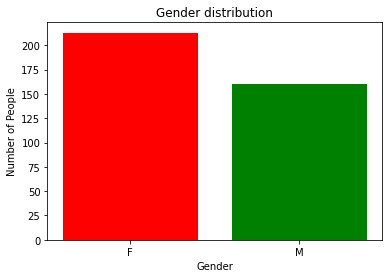

In [ ]:
plt.bar(X , Y , color = ['r' , 'g'])
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.title("Gender distribution")
plt.show()

In [ ]:
# this is how the plot should look like 